<a href="https://colab.research.google.com/github/ghamawell/crawling-data-by-twitter/blob/main/Belajar_Prediction_Deases_Cardiovascular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#1 Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

from sklearn.pipeline import Pipeline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
cd /content/gdrive/'My Drive'/

/content/gdrive/My Drive


In [ ]:
ls

In [ ]:
#2 Importing the dataset
dataset = pd.read_csv('cardio_train.csv', sep=';')
df_cardio = pd.DataFrame(dataset)
df_cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [ ]:
df_cardio = df_cardio.drop(['id'], axis = 1)

In [ ]:
df_cardio.info()
df_cardio.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          69301 non-null  int64  
 1   gender       69301 non-null  int64  
 2   height       69301 non-null  int64  
 3   weight       69301 non-null  float64
 4   ap_hi        69301 non-null  int64  
 5   ap_lo        69301 non-null  int64  
 6   cholesterol  69301 non-null  int64  
 7   gluc         69301 non-null  int64  
 8   smoke        69301 non-null  int64  
 9   alco         69301 non-null  int64  
 10  active       69301 non-null  int64  
 11  cardio       69301 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.3 MB


(69301, 12)

In [ ]:
df_cardio.value_counts(['cardio'])

cardio
0         34679
1         34622
dtype: int64

In [ ]:
corr_matrix = df_cardio.corr().abs()
corr_matrix

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,0.023150,0.081304,0.054409,0.020663,0.017717,0.154343,0.099095,0.047680,0.029435,0.009926,0.238095
gender,0.023150,1.000000,0.499373,0.155649,0.005980,0.015396,0.036335,0.021154,0.337608,0.171015,0.006241,0.008592
height,0.081304,0.499373,1.000000,0.290333,0.005492,0.006215,0.050632,0.018929,0.187899,0.094164,0.005974,0.011015
weight,0.054409,0.155649,0.290333,1.000000,0.030665,0.043652,0.141901,0.107255,0.068304,0.067259,0.016514,0.182094
ap_hi,0.020663,0.005980,0.005492,0.030665,1.000000,0.015919,0.023573,0.011821,0.000933,0.001385,0.000032,0.054211
ap_lo,0.017717,0.015396,0.006215,0.043652,0.015919,1.000000,0.024023,0.010895,0.004948,0.010764,0.004962,0.065290
cholesterol,0.154343,0.036335,0.050632,0.141901,0.023573,0.024023,1.000000,0.451741,0.010237,0.036015,0.009708,0.220752
gluc,0.099095,0.021154,0.018929,0.107255,0.011821,0.010895,0.451741,1.000000,0.004608,0.011442,0.007301,0.089062
smoke,0.047680,0.337608,0.187899,0.068304,0.000933,0.004948,0.010237,0.004608,1.000000,0.339709,0.025794,0.015225
alco,0.029435,0.171015,0.094164,0.067259,0.001385,0.010764,0.036015,0.011442,0.339709,1.000000,0.025745,0.007217


Text(0.5, 1.0, 'Correlation Plot')

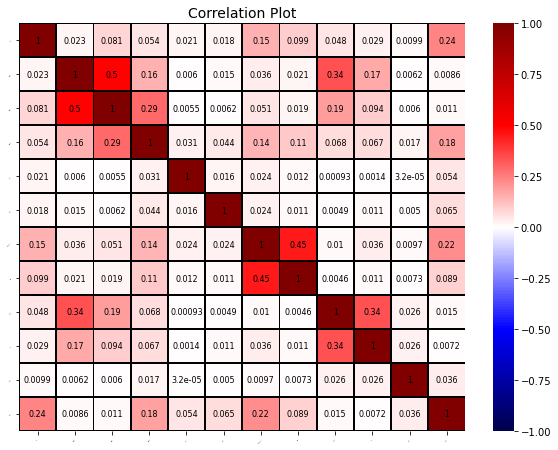

In [ ]:
fig = plt.figure(figsize=(10, 7.5))

sns.heatmap(corr_matrix,
            cmap='seismic',
            linewidths=0.75,
            linecolor='black',
            cbar = True,
            vmin = -1,
            vmax = 1,
            annot= True,
            annot_kws={'size':8, 'color': 'black'})
plt.tick_params(labelsize = 1, rotation =45)
plt.title('Correlation Plot', size =14)

In [ ]:
X = df_cardio.drop(['cardio', 'active'], axis=1)
Y = df_cardio.cardio

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=7)

In [ ]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
datapredict = X.head(20)
y_pred = LR.predict(datapredict)
for result in y_pred:
    if result == 1:
        print('Prediction Result', result, 'Cardiovascular')
    elif result == 0:
        print('Prediction Result', result, 'Non Cardiovascular')
    else:
        print('Prediction Result', result, 'New Data')

Prediction Result 1 Cardiovascular
Prediction Result 0 Non Cardiovascular
Prediction Result 0 Non Cardiovascular
Prediction Result 0 Non Cardiovascular
Prediction Result 1 Cardiovascular
Prediction Result 0 Non Cardiovascular
Prediction Result 0 Non Cardiovascular
Prediction Result 1 Cardiovascular
Prediction Result 0 Non Cardiovascular
Prediction Result 1 Cardiovascular
Prediction Result 1 Cardiovascular
Prediction Result 1 Cardiovascular
Prediction Result 1 Cardiovascular
Prediction Result 0 Non Cardiovascular
Prediction Result 1 Cardiovascular
Prediction Result 0 Non Cardiovascular
Prediction Result 1 Cardiovascular
Prediction Result 1 Cardiovascular
Prediction Result 0 Non Cardiovascular
Prediction Result 0 Non Cardiovascular


In [ ]:
y_pred = LR.predict(X_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.7031888798037612

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[7771 2555]
 [3616 6849]]
